# BLUESKY

This notebook demos the webscraping and analysis abilities of BLUESKY.
BLUESKY is a Python package that returns information about vehicle prices.

In [1]:
# IMPORT STATEMENTS
from BLUESKY.scrapers.bs4_scraper import scrape_data_payload
from BLUESKY.scrapers.genurls import gen_cars_com_urls
from BLUESKY.stats.clean import calc_pct_deltas, sort_trims

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Generating Target URLS to scrape from

In [2]:
car_dict = {
    #"ford": ["mustang", "f_150"],
    #"toyota": ["camry", "supra"],
    "bmw": ["330", "z4", "430", "m340", "m440",],
    "audi": ["a4", "s4", "s3"]
    #"acura": ["integra"],

}

url_targets = gen_cars_com_urls(input_dict=car_dict)


In [3]:
temp = scrape_data_payload(url_targets)

Processing the scraped data

In [4]:
columns = ["make", "model", "model_year", "trim", "mileage", "price", "listing_id", "bodystyle", ] 

df = pd.DataFrame(temp, columns=columns)

In [5]:
scraped_results = {}
cat_model_list = []
for make in car_dict.keys():
    for model in car_dict[make]:
        filt = (df["make"]==make) & (df["model"]==model)
        scraped_results[make+"_"+model] = df[filt]


In [15]:
%%capture --no-stdout --no-display

m340 = scraped_results["bmw_m340"]
m440 = scraped_results["bmw_m440"]
a4 = scraped_results["audi_a4"]

m440_mod = sort_trims(m440)
#a4 = sort_trims(a4)
trims, counts = np.unique(np.array(a4["trim"]),return_counts=True)
for e in zip(trims,counts):
    print(e)

m340 = calc_pct_deltas(m340)
m440 = calc_pct_deltas(m440)
a4 = calc_pct_deltas(a4)

('2.0t', 2)
('2.0t_avant_premium_plus_quattro', 1)
('2.0t_cabriolet_quattro', 1)
('2.0t_premium', 37)
('2.0t_premium_plus', 33)
('2.0t_premium_plus_quattro', 11)
('2.0t_premium_quattro', 6)
('2.0t_prestige', 6)
('2.0t_quattro', 1)
('2.0t_tech_ultra_premium', 1)
('2.0t_titanium_premium', 1)
('2.0t_ultra_premium', 2)
('2.0t_ultra_premium_plus', 1)
('3.2', 1)
('3.2_premium_plus_quattro', 1)
('3.2_quattro', 1)
('40_premium', 27)
('40_premium_plus', 15)
('40_prestige', 3)
('40_titanium_premium', 1)
('45_premium', 18)
('45_premium_plus', 2)
('45_s_line_premium_plus', 16)
('45_s_line_prestige', 1)
('45_s_line_quattro_premium', 7)
('premium', 2)
('premium_plus', 1)
('season_of_audi_ultra_premium', 1)


Beginning analysis. 

TODO:
- change model years to delta time from present
- depreciation per mile, per year
    - per mile per year?

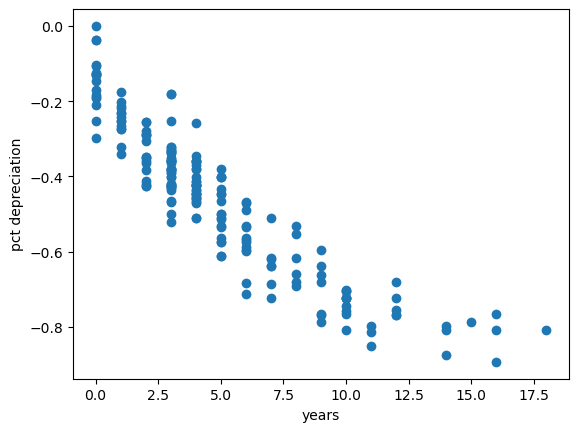

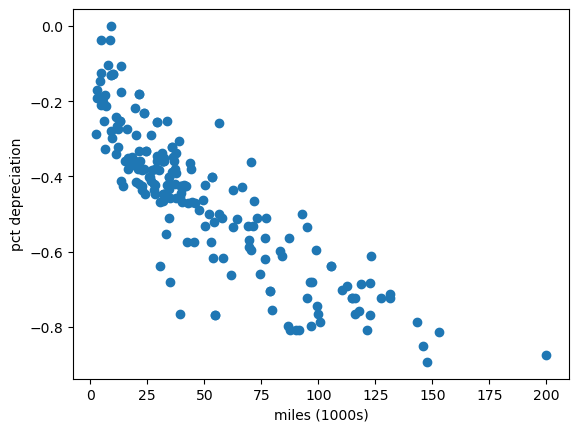

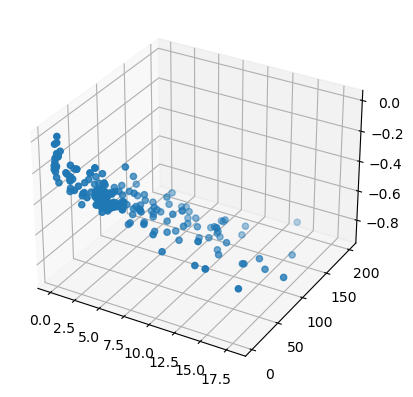

In [16]:
plt.figure(1)
plt.scatter(a4["year_delta"], a4["price_pct"])
plt.xlabel("years")
plt.ylabel("pct depreciation")

plt.figure(2)
plt.scatter(a4["mileage"].values.astype(float)/1000, a4["price_pct"])
plt.xlabel("miles (1000s)")
plt.ylabel("pct depreciation")

plt.figure(3)
ax = plt.axes(projection ="3d")
ax.scatter3D(a4["year_delta"], a4["mileage"].values.astype(float)/1000, a4["price_pct"])

